<a href="https://colab.research.google.com/github/sakuna47/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [3]:
!pip install tensorflow keras numpy matplotlib pandas scikit-learn
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

Load and  Preprocess data

In [4]:
# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Build the CNN Model

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Train the Model

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8928 - loss: 0.3419 - val_accuracy: 0.9855 - val_loss: 0.0460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9859 - loss: 0.0460 - val_accuracy: 0.9875 - val_loss: 0.0402
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9897 - loss: 0.0332 - val_accuracy: 0.9914 - val_loss: 0.0263
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9907 - val_loss: 0.0281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9921 - val_loss: 0.0280
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9902 - val_loss: 0.0307
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 0.9924 - val_loss: 0.0274
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9964 -

Evaluate the Model

313/313 - 6s - 21ms/step - accuracy: 0.9916 - loss: 0.0300
Test Accuracy: 0.991599977016449


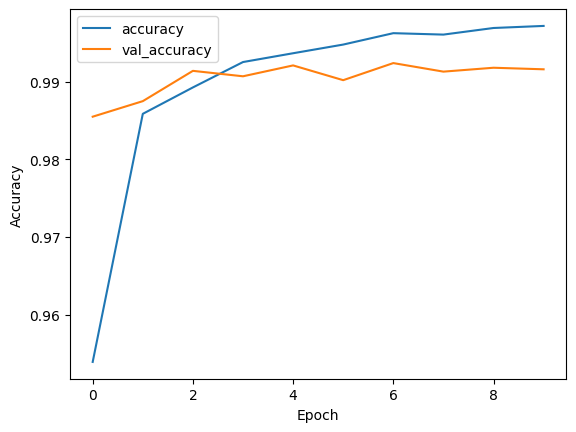

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
[[ 978    1    0    0    0    0    0    1    0    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   1    1 1026    1    1    0    0    2    0    0]
 [   0    0    3 1003    0    3    0    0    1    0]
 [   0    0    0    0  965    0    4    1    1   11]
 [   2    0    0    9    0  874    3    1    1    2]
 [   2    2    0    0    0    0  953    0    1    0]
 [   0    1    8    0    0    0    0 1015    0    4]
 [   2    0    2    0    0    1    0    1  967    1]
 [   1    0    0    1    1    5    0    0    0 1001]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99     

In [7]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix and classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))